In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_rel,wilcoxon

ci_df = pd.read_csv('Desktop/final_dataset_last.csv')
print("First 5 rows Below : ")
print(ci_df.head())
print("\n Description Below : ")
print(ci_df.describe())
print("\n CI Projects - Numeric Columns with NaN values:")
print(ci_df.select_dtypes(include=['number']).isna().sum())
print("\n CI Projects - Numeric Columns Variance:")
print(ci_df.select_dtypes(include=['number']).var())
print("\n CI Projects Data Types:")
print(ci_df.dtypes)


First 5 rows Below : 
                        repo_name  stars  issues  open_prs  closed_prs  \
0                   alibaba/nacos  30811     242        13        4134   
1                   alibaba/canal  28794    1156        62         635   
2  OpenAPITools/openapi-generator  22745    5122       516       11242   
3             pockethub/PocketHub   9386     127         2         628   
4          java-native-access/jna   8616     107        14         830   

   total_prs language  is_fork  \
0       4147     Java    False   
1        697     Java    False   
2      11758     Java    False   
3        630     Java    False   
4        844     Java    False   

                                                 url  size_mb  ...  \
0                   https://github.com/alibaba/nacos    59.37  ...   
1                   https://github.com/alibaba/canal    23.52  ...   
2  https://github.com/OpenAPITools/openapi-generator   881.42  ...   
3             https://github.com/pockethub/Pocke

Average Code Coverage Percentage is  18.860824718911285


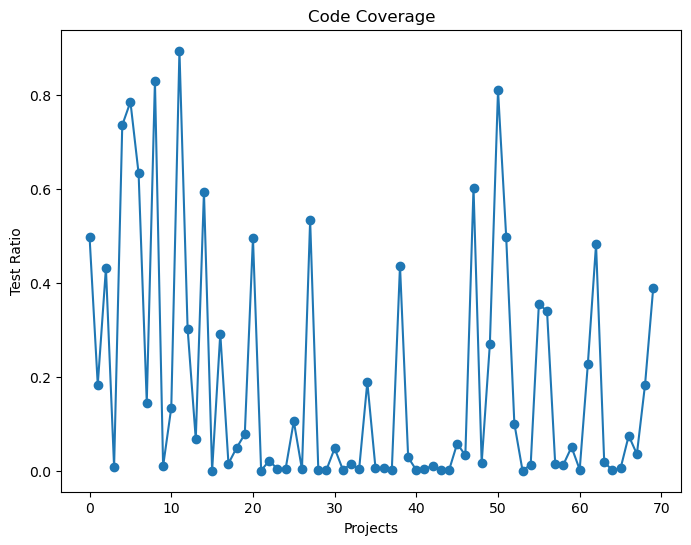

In [2]:
#Calculating and Plotting Test Code Ratio
ci_df['Test_Ratio'] = ci_df['test_LOC'] / ci_df['total_LOC']
plt.figure(figsize=(8, 6))
plt.title('Code Coverage')
plt.plot(range(len(ci_df)),ci_df['Test_Ratio'], marker='o', linestyle='-')  # Line plot with markers
plt.xlabel('Projects')
plt.ylabel('Test Ratio')
mean_value = ci_df['Test_Ratio'].mean()
print("Average Code Coverage Percentage is ",mean_value*100)

Average number of commits before CI 3388.0857142857144
Average number of commits after CI 8696.142857142857


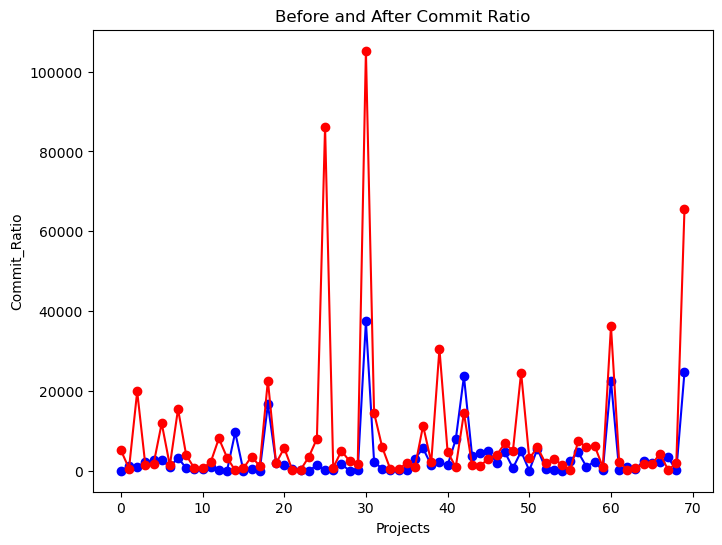

In [3]:
#Comparing before CI commits and after CI commits
ci_df['Before_CI_Commit_Ratio'] = ci_df['commits_before_CI'] / ci_df['commits_before_CI']+ci_df['commits_after_CI']
ci_df['After_CI_Commit_Ratio'] = ci_df['commits_after_CI'] / ci_df['commits_before_CI']+ci_df['commits_after_CI']
plt.figure(figsize=(8, 6))
plt.title('Before and After Commit Ratio')
plt.plot(range(len(ci_df)),ci_df['commits_before_CI'], marker='o', linestyle='-',color='blue') 
plt.plot(range(len(ci_df)),ci_df['commits_after_CI'], marker='o', linestyle='-',color='red')  # Line plot with markers
plt.xlabel('Projects')
plt.ylabel('Commit_Ratio')
 
mean_value = ci_df['commits_before_CI'].mean()
print("Average number of commits before CI", mean_value)
mean_value = ci_df['commits_after_CI'].mean()
print("Average number of commits after CI", mean_value)
plt.show()

In [4]:
t_stat, p_value = ttest_rel(ci_df['commits_before_CI'], ci_df['commits_after_CI'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in commits before and after CI.")
else:
    print("There is no significant difference in commits before and after CI.")

stat, p = wilcoxon(ci_df['commits_before_CI'], ci_df['commits_after_CI'])
print(f"Wilcoxon test statistic: {stat}, P-value: {p}")

if p < 0.05:
    print("There is a significant difference in commits before and after CI.")
else:
    print("No significant difference detected.")

T-statistic: -3.060039894422023, P-value: 0.003150916875723846
There is a significant difference in commits before and after CI.
Wilcoxon test statistic: 493.0, P-value: 1.1533732876687703e-05
There is a significant difference in commits before and after CI.


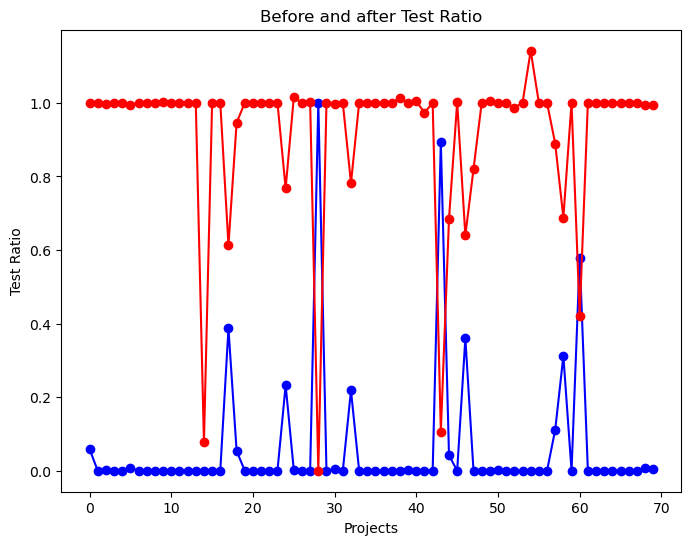

Mean Test Ratio before CI 0.06115948552150087
Mean Test Ratio after CI 0.9222426364781188


In [5]:
#Calculating and Plotting Test Code Ratio 
ci_df['Test_Ratio_beforeCI'] = ci_df['testloc_beforeci'] / ci_df['test_LOC']
ci_df['Test_Ratio_afterCI'] = ci_df['testloc_afterci'] / ci_df['test_LOC']
plt.figure(figsize=(8, 6))
plt.title('Before and after Test Ratio')
plt.plot(range(len(ci_df)),ci_df['Test_Ratio_beforeCI'], marker='o', linestyle='-',color='blue') 
plt.plot(range(len(ci_df)),ci_df['Test_Ratio_afterCI'], marker='o', linestyle='-',color='red')
plt.xlabel('Projects')
plt.ylabel('Test Ratio')
plt.show()
 
mean_value = ci_df['Test_Ratio_beforeCI'].mean()
print("Mean Test Ratio before CI", mean_value)
mean_value = ci_df['Test_Ratio_afterCI'].mean()
print("Mean Test Ratio after CI", mean_value)
plt.show()


In [6]:
t_stat, p_value = ttest_rel(ci_df['Test_Ratio_beforeCI'], ci_df['Test_Ratio_afterCI'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in Test Ratio before and after CI.")
else:
    print("There is no significant difference in Test Ratio  before and after CI.")

stat, p = wilcoxon(ci_df['commits_before_CI'], ci_df['commits_after_CI'])
print(f"Wilcoxon test statistic: {stat}, P-value: {p}")

if p < 0.05:
    print("There is a significant difference in Test Ratio  before and after CI.")
else:
    print("No significant difference detected.")

T-statistic: -18.746063585798083, P-value: 8.751391214145284e-29
There is a significant difference in Test Ratio before and after CI.
Wilcoxon test statistic: 493.0, P-value: 1.1533732876687703e-05
There is a significant difference in Test Ratio  before and after CI.


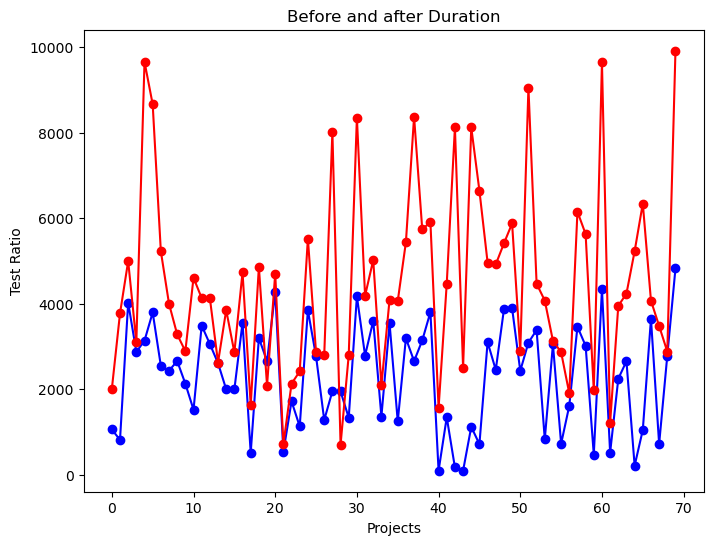

Average number of days using Travis CI 2321.4
Average number of days of all projects 4499.585714285714


'travis_mean_value/total_mean_value 1:2'

In [7]:
#Analyzing and Plotting Time Period
plt.figure(figsize=(8, 6))
plt.title('Before and after Duration')
plt.plot(range(len(ci_df)),ci_df['travis_duration_days'], marker='o', linestyle='-',color='blue') 
plt.plot(range(len(ci_df)),ci_df['total_duration'], marker='o', linestyle='-',color='red')
plt.xlabel('Projects')
plt.ylabel('Test Ratio')
plt.show()
 
travis_mean_value = ci_df['travis_duration_days'].mean()
print("Average number of days using Travis CI", travis_mean_value)

total_mean_value = ci_df['total_duration'].mean()
print("Average number of days of all projects", total_mean_value)
plt.show()

'''travis_mean_value/total_mean_value 1:2'''

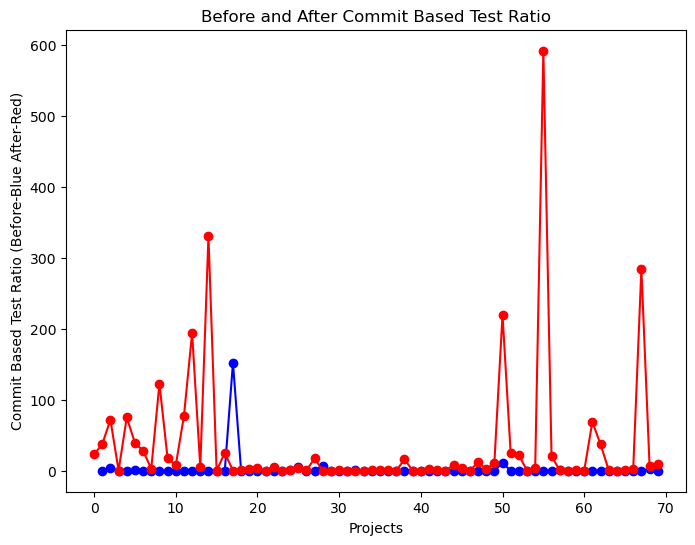

Average number of days using Travis CI 2321.4
Average number of days of all projects 4499.585714285714


In [8]:
#Analyzing and Plotting Commit Based Test Ratio before and after adoption of CI
ci_df['Before_CI_CommitTest_Ratio'] = ci_df['testloc_beforeci'] /ci_df['commits_before_CI']
ci_df['After_CI_CommitTest_Ratio'] = ci_df['testloc_afterci'] /ci_df['commits_after_CI'] 
plt.figure(figsize=(8, 6))
plt.title('Before and After Commit Based Test Ratio')
plt.plot(range(len(ci_df)),ci_df['Before_CI_CommitTest_Ratio'], marker='o', linestyle='-',color='blue') 
plt.plot(range(len(ci_df)),ci_df['After_CI_CommitTest_Ratio'], marker='o', linestyle='-',color='red')
plt.xlabel('Projects')
plt.ylabel('Commit Based Test Ratio (Before-Blue After-Red)')
plt.show()
 
travis_mean_value = ci_df['travis_duration_days'].mean()
print("Average number of days using Travis CI", travis_mean_value)

total_mean_value = ci_df['total_duration'].mean()
print("Average number of days of all projects", total_mean_value)
plt.show()

In [9]:
t_stat, p_value = ttest_rel(ci_df['Before_CI_CommitTest_Ratio'], ci_df['After_CI_CommitTest_Ratio'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in Commit Based Test Ratio before and after CI.")
else:
    print("There is no significant difference in Commit Based Test Ratio  before and after CI.")

stat, p = wilcoxon(ci_df['commits_before_CI'], ci_df['commits_after_CI'])
print(f"Wilcoxon test statistic: {stat}, P-value: {p}")

if p < 0.05:
    print("There is a significant difference in Commit Based Test Ratio before and after CI.")
else:
    print("No significant difference detected.")

T-statistic: nan, P-value: nan
There is no significant difference in Commit Based Test Ratio  before and after CI.
Wilcoxon test statistic: 493.0, P-value: 1.1533732876687703e-05
There is a significant difference in Commit Based Test Ratio before and after CI.


C:\Users\apoor\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1054: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
